In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Data_Pure.xlsx')
df.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Output
0,807,317,163,178,80,65,0.112
1,875,346,164,173,79,60,0.420
2,837,331,173,188,87,69,0.687
3,710,293,167,184,87,70,0.869
4,646,270,169,191,93,76,0.952


In [0]:
#data preparation for random forest
y = np.array(df['Output'])

# Remove the labels from the features
# axis 1 refers to the columns
df= df.drop('Output', axis = 1)

# Saving feature names for later use
df_list = list(df.columns)

# Convert to numpy array
df = np.array(df)

In [4]:
#training and testing
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 42)#x_train x_test y_train y_test
#"I am setting the random state to 42 which means the results will be the same each time I run the split for reproducible results." ne demek istenmis?
print('Training df Shape:', df_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing df Shape:', df_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training df Shape: (87, 6)
Training Labels Shape: (87,)
Testing df Shape: (30, 6)
Testing Labels Shape: (30,)


In [0]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42) #10 decision tree
rf.fit(df_train, y_train);#training the model with traning data

In [6]:
from sklearn.metrics import confusion_matrix #conf_mat taki esitsizlik icin denemistim
from sklearn.preprocessing import StandardScaler
scaler_df = StandardScaler()
df_test = scaler_df.transform(df_test)

NotFittedError: ignored

In [7]:
predictions = rf.predict(df_test)#forest's predict method on the test data
predictions

array([1.17  , 0.7581, 1.385 , 1.108 , 1.6253, 0.582 , 0.6216, 0.584 ,
       0.6344, 1.7434, 1.014 , 0.6172, 0.57  , 0.6197, 2.0501, 0.5478,
       0.524 , 0.574 , 0.57  , 0.5231, 0.529 , 0.6112, 0.3989, 1.724 ,
       2.0686, 0.53  , 0.591 , 0.626 , 0.56  , 0.5372])

In [8]:
# absolute errors
error = abs(predictions - y_test)
# mean absolute error 
print('Mean Absolute Error:', round(np.mean(error), 2), 'degrees.')#how can we see that how much we improve the model?

Mean Absolute Error: 0.19 degrees.


In [9]:
# Probabilities for each class
rf_probs = rf.predict_proba(df_test)[:, 1]#?
#predict_proba gives you the probabilities for the target in array form.
#The number of probabilities for each row is equal to the number of categories in target variable 

AttributeError: ignored

In [0]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (error / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [10]:
print (y.shape)
print (predictions.shape)

(117,)
(30,)


In [11]:
# Visualise classical Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, predictions)
print(conf_mat)

ValueError: ignored

In [12]:
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = df_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

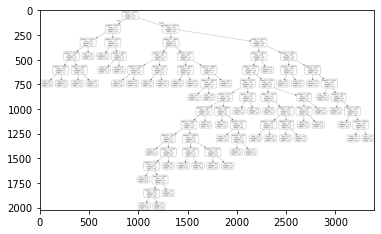

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('tree.png')
#img = img.resize((100, 100), Image.ANTIALIAS) #resmi buyutme cabam,fakat calismadi
#img.save(img, optimize=True)

plt.imshow(img)
plt.show()

In [0]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(df_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = df_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

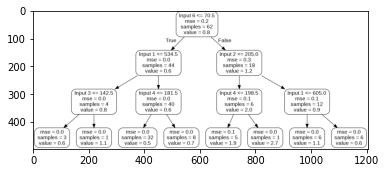

In [16]:
img = mpimg.imread('small_tree.png')
plt.imshow(img)
plt.show()

In [17]:
#Importance of variables
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df, round(importance, 2)) for df, importance in zip(df_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Input 1              Importance: 0.41
Variable: Input 2              Importance: 0.25
Variable: Input 6              Importance: 0.19
Variable: Input 5              Importance: 0.1
Variable: Input 4              Importance: 0.04
Variable: Input 3              Importance: 0.01


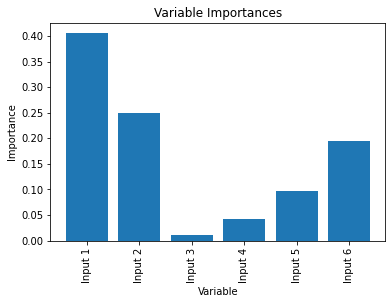

In [18]:
x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, df_list, rotation='vertical')
plt.ylabel('Importance'); 
plt.xlabel('Variable');
plt.title('Variable Importances');